# MODELO DE APRENDIZAJE AUTOMÁTICO 

## RECONOCIMIENTO DE SEÑALES DE TRÁFICO UTILIZANDO 

## REDES NEURONALES CONVOLUCIONALES
---

![imagen](../resources/german_trafic_.png)


### Descripción del Proyecto:

Las señales de tráfico han sido diseñadas para ser fácilmente reconocibles por el cerebro humano, sin embargo para los sistemas informáticos esta clasificación sigue presentando algunas limitaciones en el reconocimiento de sus patrones.

Este proyecto consiste en la creación de un modelo predictivo de Machine Learning para el reconocimiento automático de señales de tráfico.

Para nuestro objetivo vamos a comparar dos modelos de redes neuronales convolucionales (CNN),una de nuestra configuración y otra red pre-entrenada; cambiaremos sus hiperparámetros para resolver su complejidad y hacer la comparación de sus resultados y el margen. de error. que cada uno de ellos nos ofrece.

Para este estudio, utilizaremos el conjunto de datos recopilados en tiempo real durante más de 10 horas de trabajo por el equipo de Visión de Grupo del Benchmark de Reconocimiento de Señales de Tráfico de Alemania (GTSRB).

Finalmente nos quedaremos con el mejor resultado de predicción que se nos ofrezca y crearemos un detector de señales de tráfico en imágenes basado en Deep Learning.

#### Conjunto de datos : 

+ Problema de clasificación de una sola imagen y varias clases
+ Más de 40 clases
+ Más de 50.000 imágenes en total
+ Base de datos grande y realista

#### Estructura de los datos:

+ El conjunto de datos  de entrenamiento está estructurado de la siguiente manera:
+ Un directorio por clase
+ Cada directorio contiene un archivo CSV con anotaciones ("GT- <ClassID> .csv") y sus imágenes de entrenamiento
+ Las imágenes de entrenamiento están agrupadas por carpetas
+ Cada carpeta contiene 30 imágenes de una única señal de tráfico real.

#### Formato de Imágenes

+ Las imágenes contienen una señal de tráfico cada una.
+ Las imágenes contienen un borde del 10% alrededor de la señal de tráfico real (al menos 5 píxeles) para permitir enfoques basados ​​en bordes.
+ Las imágenes se almacenan en formato PPM (Portable Pixmap, P6)
+ Los tamaños de imagen varían entre 15x15 y 250x250 píxeles
+ Las imágenes no son necesariamente cuadradas.
+ La señal de tráfico real no está necesariamente centrada dentro de la imagen.

#### Palabras clave:
+   Visión artificial
+   Deep Learning,
+   Entrenamiento supervisado profundo
+   Redes Neuronales


### Breve Introducción

El Aprendizaje Profundo es un conjunto de algoritmos de Aprendizaje Automático que se 
centran en emular el enfoque de aprendizaje de los seres humanos, pudiendo modelar 
abstracciones de alto nivel de los datos utilizando arquitecturas computacionales que admiten 
operaciones no lineales. 

La arquitectura computacional más usada para el Deep Learning es la Red Neuronal. Estas redes 
neuronales están formadas por múltiples capas. Las neuronas de una capa están conectadas con 
las adyacentes por medio de conexiones, las cuales tienen asociado un peso.

### Red Neuronal Artificial

![imagen](../resources/red_neuronal_artificial.png)

### La Red Neuronal Convolucional
La Red Neuronal Convolucional (Convolutional Neuronal Network, CNN o ConvNet) es una clase
de red de aprendizaje profundo, aplicada en el análisis visual de imágenes. Las principales 
aplicaciones que tiene son reconocimiento de imágenes y vídeos, clasificación de imágenes y 
procesamiento del lenguaje natural

![imagen](../resources/cnn.jpg)


Este tipo de Red Neuronal, por medio de entrenamiento y aprendizaje supervisado, intenta 
imitar cómo funciona las neuronas en la corteza visual de nuestro cerebro. Por lo tanto, estas 
tienen muchas capas ocultas especializadas, las cuales siguen una jerarquía. Las primeras capas 
irán detectando líneas y curvas, las siguientes irán cada vez abstrayéndose más hasta poder 
identificar formas complejas. 

A continuación, vamos a mostrar las formas que sería capaz de reconocer cada capa de una CNN.
Realmente, son las formas que hace que una neurona de esa capa maximice su activación.

![imagen](../resources/ejemplo_imagen.png)



#### CLASIFICACIÓN DE SEÑALES DE TRÁFICO 

Vamos a desarrollar y comparar algoritmos de clasificación de señales de tráfico. 
En primer lugar, mostraremos el conjunto de datos al que nos enfrentamos. A continuación, 
desarrollaremos los algoritmos utilizados y qué resultados han obtenido en el problema.

#### Conjunto de datos:

El conjunto de datos (dataset) que se va a usar para entrenar a los clasificadores es GTSRB (The 
German Traffic Sign Recognition Benchmark).
Está formado por 39 209 imágenes en el conjunto de entrenamiento y por 12 631 en el conjunto 
de pruebas (test). 

### Data Analysis

In [1]:
#Importamos librerias necesarias 
import pandas as pd
import numpy as np 

#modulos propios 
from utils import folders_tb as f
from utils import models as mo
from utils import visualization_tb as vt

#visualización de imágenes
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

#path
import os
from os import listdir
from os.path import isfile, join

#keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow import keras

#Usaremos la libreria Open Cv para el conjunto de test
import cv2 as cv
from PIL import Image

import warnings
warnings.filterwarnings('ignore')


Como podemos comprobar en cada csv correspondiente Test/Train/Meta en nuestros conjuntos de datos y entrenamiento, se puede ver que las columnas contienen como valores, las rutas hacia cada una de las imágenes, las clases a las que pertenecen, las medidas ancho,por alto en píxeles  y otros correspondiente a cada imágen a analizar.

In [2]:
# Este es nuestro conjunto de entrenamiento
training_set = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "Train.csv")
training_set.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [3]:
#conjunto de test

test_set = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "Test.csv")
test_set.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [4]:
#conjunto meta
meta_set = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "Meta.csv")
meta_set.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [7]:
#Clases de señales
sign_names = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "sign_name.csv")
sign_names.head()

,ClassID,Sign Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [8]:
sign_names.to_json(f.curr_path()+ os.sep + 'reports' + os.sep + "data_cleaned.json")

## Feature Enginering

### Visualización de las diferentes Clases en los conjuntos de Test y de Train

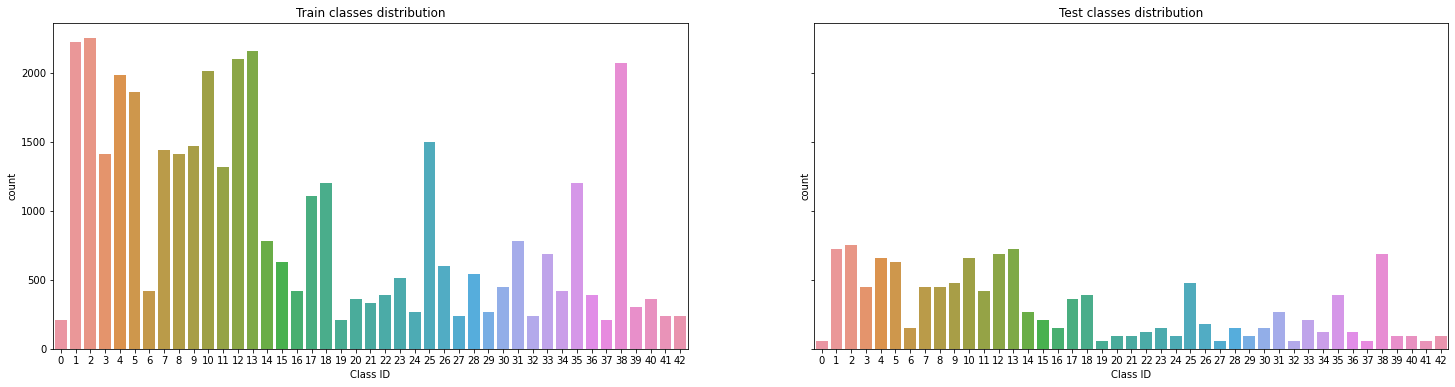

In [5]:
vt.distribucion_clases(training_set,test_set)

### Visualización de los diferentes píxeles en las imágenes

El conjunto de datos contiene miles de imágenes. Las imágenes no tienen la misma resolución. Algunos de ellos son grandes, otros son pequeños. De alguna manera deberíamos elegir la resolución apropiada de las muestras. La mejor manera de visualizar la correlación de ancho y alto: mediante el trazado multivariante.

Como podemos ver a continuación, la mayoría de las imágenes son rectangulares. La mayoría de las muestras tienen unos 35x35 píxeles. Y solo unas pocas muestras tienen una gran resolución como 100x100 píxeles.

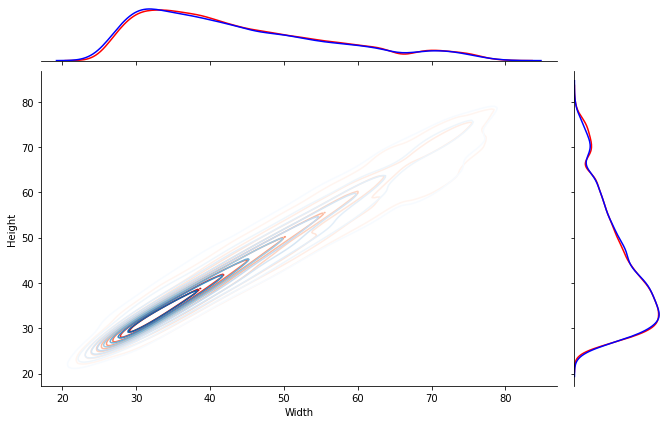

<Figure size 432x288 with 0 Axes>

In [6]:
vt.diferentes_pixeles(training_set,test_set)

### Simple Visualización de las señales y sus respectivas clases

Para visulizar estas imágenes nos hemos ayudado de la librerias Keras y asi poder inspeccionar la carpeta Train, la cual contiene subcarpetas que indican sus 43 clases

In [10]:
batch_size = 32
img_height = 30
img_width = 30
data_train = f.curr_path() + os.sep + 'data' + os.sep + "Train" 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_train, validation_split=0.25,subset="training",
    seed=43,image_size=(img_height, img_width),batch_size =batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_train, validation_split=0.25, subset="validation",
    seed=43, image_size=(img_height, img_width),batch_size=batch_size)

Found 39209 files belonging to 43 classes.
Using 29407 files for training.
Found 39209 files belonging to 43 classes.
Using 9802 files for validation.


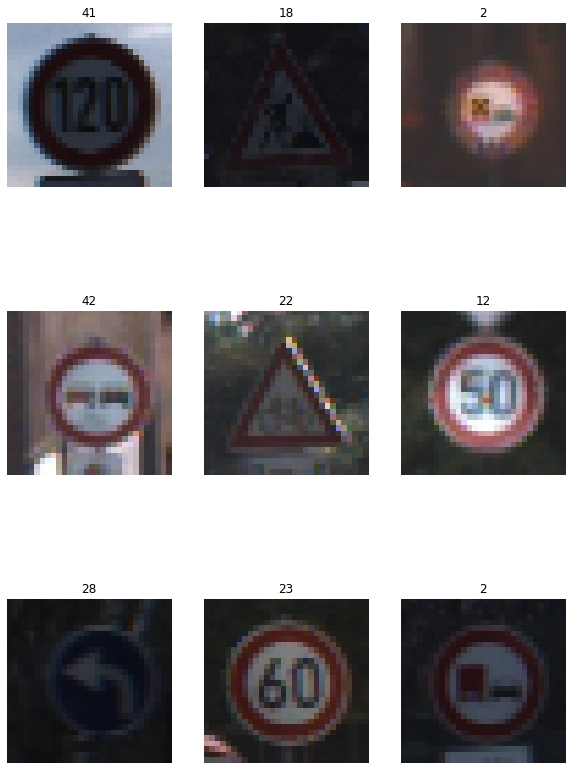

In [11]:
vt.labels_images(train_ds)

### Deep Learning
Como hemos explicado anteriormente, las Redes Neuronales Convolucionales son, en teoría, la 
mejor alternativa para crear modelos de aprendizaje automático en la clasificación y detección 
de imágenes. 
Empezaremos presentando una dos redes Neuronales Convolucionales hechas por mí – la llamare, My best Model, que tiene mi mejor porcentaje de acierto; seguido de mi modelo Optimizado. Después, utilizaré el primer modelo famoso de CNN que suele dar muy buenos resultados experimentales,
este será la red LexNet-5

Los hiperparámetros que vamos a emplear para esta parte son: 

+   Número de épocas: 32.
+   Factor de aprendizaje (alfa): 0.001.
+   Tamaño de lote: 64 imágenes. 
Con el número de ejemplo que tenemos, vamos a acabar haciendo 919 pasadas hasta hacer una 
época, es decir, recorrer complemente el dataset de aprendizaje. 

### CNN (My best Model)
He creado para resolver la clasificación de señales de tráfico un modelo CNN simple. Este no 
tiene ninguna configuración en especial, simplemente sigue los fundamentos de una Red 
Neuronal Convolucional. 
Puede resultar interesante probar este modelo, ya que más tarde probaremos otros que han 
resultado muy buenos para la clasificación de imágenes. Así que, podremos comprar el 
rendimiento de una ConvNet estándar con este más avanzado.

La red, estará compuesta por *3 Capas Convolucionales*: 
+   En la primera usaremos 8 filtros de tamaño 3x3 con relleno (padding, same
convolution). Es decir, la imagen no se reducirá de tamaño. Aplicaremos la función de 
activación RELU, haremos una Normalización por Lotes y para terminar haremos 
MaxPooling 2x2. 
+   La segunda estará compuesta por 16 filtros de tamaño 3x3. En el resto, la misma 
configuración. 
+   En la tercera capa vamos a poner 32 filtros 3x3. El resto de la configuración igual. 
Las últimas 2 capas Full-Connected tendrán la siguiente configuración: 128 neuronas con 
activación RELU. Haremos Normalización por Lotes y Dropout de 0.5 de probabilidad. 
La capa de salida será evidentemente, una con 43 neuronas de salida, con la función de 
activación Softmax. 

#### A continuación, se muestra el resumen del modelo: 

In [14]:
model = mo.my_best_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 9, 128)         512       
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0

In [17]:
callback = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=1e-1, patience=8, verbose=1, min_lr = 2e-6)
opt = Adam(learning_rate = 1e-3)

In [18]:
model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,  batch_size = 128, 
         epochs=10, validation_data = val_ds, verbose=1,callbacks=[callback, reduce_lr])

Epoch 1/10
919/919 [==============================] - 86s 93ms/step - loss: 7.7459 - accuracy: 0.6913 - val_loss: 3.9157 - val_accuracy: 0.9152
Epoch 2/10
919/919 [==============================] - 87s 94ms/step - loss: 3.7472 - accuracy: 0.8607 - val_loss: 3.1357 - val_accuracy: 0.9427
Epoch 3/10
919/919 [==============================] - 87s 95ms/step - loss: 2.9853 - accuracy: 0.8907 - val_loss: 2.6983 - val_accuracy: 0.9345
Epoch 4/10
919/919 [==============================] - 87s 95ms/step - loss: 2.6299 - accuracy: 0.9034 - val_loss: 2.4379 - val_accuracy: 0.9310
Epoch 5/10
919/919 [==============================] - 87s 95ms/step - loss: 2.5166 - accuracy: 0.9079 - val_loss: 2.1002 - val_accuracy: 0.9700
Epoch 6/10
919/919 [==============================] - 110s 120ms/step - loss: 2.2979 - accuracy: 0.9136 - val_loss: 2.1388 - val_accuracy: 0.9441
Epoch 7/10
919/919 [==============================] - 108s 118ms/step - loss: 2.0751 - accuracy: 0.9206 - val_loss: 1.7885 - val_accur

In [20]:
#Guardamos nuestro modelo

model.save('../models/prueba_final.h5')

### MODELO OPTIMIZADO

Para este modelo, hemos realizado otra partición diferente de los conjuntos de test y de entrenamiento, utilizando Skclearn.

In [54]:
data = []
labels = []
classes = 43
cur_path = f.curr_path() + os.sep + 'data' + os.sep + "Train"

In [29]:
for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv.imread(img_path,-1)
        img = cv.resize(img, (30,30), interpolation = cv.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
x_train = np.array(data)
x_train = x_train / 255
y_train = np.array(labels).astype(np.float)

In [31]:
# Importamos aquí estas librerias para indicar las que hemos utilizado en esta nueva partición de mis datos
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import accuracy_score

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(31367, 30, 30, 3) (31367,)
(7842, 30, 30, 3) (7842,)


In [40]:
modelo_optimizado = mo.my_best_model()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        4864      
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        102464    
_________________________________________________________________
batch_normalization_13 (Batc (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 128)         204928    
_________________________________________________________________
batch_normalization_14 (Batc (None, 9, 9, 128)         512       
_________________________________________________________________
dropout_12 (Dropout)         (None, 9, 9, 128)        

In [41]:
callback = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=1e-1, patience=8, verbose=1, min_lr = 2e-6)
opt = Adam(learning_rate = 1e-3)

In [42]:
modelo_optimizado.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
history = modelo_optimizado.fit(x_train ,y_train,  batch_size = 128, 
         epochs=10, validation_data = (x_valid, y_valid),
          callbacks=[callback, reduce_lr], shuffle = True)

Epoch 1/10
246/246 [==============================] - 68s 272ms/step - loss: 9.4763 - accuracy: 0.6672 - val_loss: 8.1610 - val_accuracy: 0.2990
Epoch 2/10
246/246 [==============================] - 70s 286ms/step - loss: 4.0938 - accuracy: 0.8970 - val_loss: 4.6105 - val_accuracy: 0.5321
Epoch 3/10
246/246 [==============================] - 70s 287ms/step - loss: 2.4914 - accuracy: 0.9223 - val_loss: 2.0609 - val_accuracy: 0.9651
Epoch 4/10
246/246 [==============================] - 271s 1s/step - loss: 1.9915 - accuracy: 0.9355 - val_loss: 1.9320 - val_accuracy: 0.9417
Epoch 5/10
246/246 [==============================] - 70s 283ms/step - loss: 1.7212 - accuracy: 0.9434 - val_loss: 1.4972 - val_accuracy: 0.9611
Epoch 6/10
246/246 [==============================] - 73s 296ms/step - loss: 1.5843 - accuracy: 0.9442 - val_loss: 1.5042 - val_accuracy: 0.9657
Epoch 7/10
246/246 [==============================] - 72s 293ms/step - loss: 1.5494 - accuracy: 0.9465 - val_loss: 1.4542 - val_accu

In [45]:
#Guardamos nuestro modelo
modelo_optimizado.save('../models/modelo_optimizado.h5') 

 Nueva partición de mi conjunto de Tets, es con este conjunto con el cuál mi red se va evaluar. Indicamos a nuestra red desde donde va llegar a coger el conjunto de Test, que se encuentra en la carpeta /data/Test y va cruzar los datos con las labels extraidos del documento Test.csv

In [46]:

cur_path = f.curr_path() + os.sep + 'data' + os.sep + "Train"
test = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "Test.csv")
y_test = test["ClassId"].values
imgs = test["Path"].values
test_path = f.curr_path() + os.sep + 'data' 
data_test =[]
for img in imgs:
    image = cv.imread(f.curr_path() + os.sep + 'data' +os.sep +img)
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((30, 30))
    data_test.append(np.array( resize_image ))

In [47]:
x_test = np.array(data_test)
x_test = x_test/255
y_test = test["ClassId"].values

In [50]:
print(x_test.shape)
print(y_test.shape)

(12630, 30, 30, 3)
(12630,)


In [49]:
#Cargamos el modelo previamente guardado

nuevo_modelo = keras.models.load_model('../models/modelo_optimizado.h5')

In [55]:
result = nuevo_modelo.evaluate(x_test, y_test)  #Resultados de la evaluación

395/395 [==============================] - 10s 24ms/step - loss: 1.3467 - accuracy: 0.9365


In [58]:
print("{0}: {1:.2%}".format(nuevo_modelo.metrics_names[1], result[1]))

accuracy: 93.65%


### Usaremos una Red Neuronal preentrenada LeNet-5

El modelo de LeNet-5 original empezaría con una imagen en blanco y negro, sin embargo, en 
nuestro caso haremos que funcione con una imagen a color para que no esté en clara desventaja 
con los demás modelos. 
Los saltos en la convolución son de 1. 
El sufijo 5 es porque usamos siempre filtros de tamaño 5x5. 
Compuesta por 2 Capas Convolucionales:
+   La 1ª capa usa 6 filtros de tamaño 5x5. Usamos convolución válida (valid convolution), 
es decir, se reduce el tamaño de la imagen 32x32 a 28x28. La función de activación que 
usaremos es una RELU. Hacemos MaxPooling de 2x2. 
+   En la 2ª capa usamos 16 filtros de tamaño 5x5. En lo demás es la misma configuración 
que la capa anterior. 
A continuación, creamos 2 capas Full-Connected. 
+   1ª capa tendrá 120 neuronas, con activación RELU, Normalización por Lotes y Dropout
de 0.5.
+   La 2ª capa igual, pero con 84 neuronas. 
La capa de salida se trate, evidentemente, de una capa con 43 neuronas y Softmax.


A continuación presentamos el resumen del modelo:

In [59]:
model = mo.model_lenet_5()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 6)         456       
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 30, 6)         24        
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 16)        880       
_________________________________________________________________
batch_normalization_17 (Batc (None, 13, 13, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)              

In [60]:
callback = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=1e-1, patience=8, verbose=1, min_lr = 2e-6)
opt = Adam(learning_rate = 1e-3)

In [61]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
entremos_lenet = model.fit(x_train ,y_train,  batch_size = 128, 
         epochs=10, validation_data = (x_valid, y_valid),
          callbacks=[callback, reduce_lr], shuffle = True)

Epoch 1/10
246/246 [==============================] - 11s 43ms/step - loss: 2.5982 - accuracy: 0.3554 - val_loss: 3.3046 - val_accuracy: 0.1988
Epoch 2/10
246/246 [==============================] - 10s 42ms/step - loss: 1.2367 - accuracy: 0.6617 - val_loss: 1.0146 - val_accuracy: 0.7788
Epoch 3/10
246/246 [==============================] - 10s 42ms/step - loss: 0.8056 - accuracy: 0.7891 - val_loss: 0.3947 - val_accuracy: 0.9292
Epoch 4/10
246/246 [==============================] - 10s 42ms/step - loss: 0.6029 - accuracy: 0.8518 - val_loss: 0.3091 - val_accuracy: 0.9424
Epoch 5/10
246/246 [==============================] - 10s 41ms/step - loss: 0.5013 - accuracy: 0.8833 - val_loss: 0.2564 - val_accuracy: 0.9598
Epoch 6/10
246/246 [==============================] - 10s 41ms/step - loss: 0.4487 - accuracy: 0.8992 - val_loss: 0.2515 - val_accuracy: 0.9616
Epoch 7/10
246/246 [==============================] - 10s 41ms/step - loss: 0.3969 - accuracy: 0.9142 - val_loss: 0.2148 - val_accuracy:

In [63]:
model.save('../models/ultima_lenet.h5')

In [64]:
x_test = np.array(data_test)
x_test = x_test/255
y_test = test["ClassId"].values

In [66]:
cargo_lenet5 = keras.models.load_model('../models/ultima_lenet.h5')

In [67]:
resultado_lenet = cargo_lenet5.evaluate(x_test, y_test)

395/395 [==============================] - 2s 4ms/step - loss: 0.3344 - accuracy: 0.9345


In [70]:
print("{0}: {1:.2%}".format(cargo_lenet5.metrics_names[1], resultado_lenet[1]))

accuracy: 93.45%


## Generación de predicciones
Finalmente, nos queda el paso de usar el modelo creado en los anteriores apartados para realizar predicciones sobre qué dígito representan nuevas imágenes. Para ello Keras ofrece el método predict() de un modelo que ya ha sido previamente entrenado.

Para probar este método podemos elegir un elemento cualquiera, por ejemplo uno del conjunto de datos de test x_test. Por ejemplo elijamos el  elemento 11 de este conjunto de datos x_test y veamos a que clase corresponde según el modelo entrenado de que disponemos.

Antes vamos a ver la imagen para poder comprobar nosotros mismos  si el modelo está haciendo una predicción correcta (antes de hacer el reshape anterior):

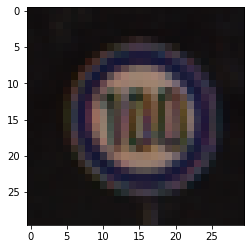

In [75]:
plt.imshow(x_test[11], cmap=plt.cm.binary)


In [77]:
predicciones = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "sign_name.csv")
predicciones.head(15)

,ClassID,Sign Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [ ]:
Ahora comprobemos que el método predict() del modelo, ejecutando el siguiente código, nos predice correctamente el valor que acabamos de estimar nosotros que debería predecir.

Para ello ejecutamos la siguiente línea de código:

In [71]:
predictions = model.predict(x_test)

### Nuestro modelo nos ha indicado que se trata de la Clase 7, comprobamos que esta clase corresponde con lo que índica la señal, velocidad restringida a 100 km/h

In [72]:
np.argmax(predictions[11])

7

In [73]:
print(predictions[11])

[1.04600886e-07 3.77918951e-07 2.27123294e-07 2.83645534e-08
 2.15861087e-06 1.12368061e-05 9.57644346e-08 9.99357998e-01
 6.21248793e-04 2.90646684e-09 1.81733824e-07 6.11465509e-08
 1.61001328e-08 8.81487860e-09 3.29622973e-09 7.73995257e-10
 2.53788517e-06 1.15726884e-09 1.71437335e-08 9.22845134e-10
 1.19263877e-09 2.20815313e-08 1.23386426e-10 9.67227520e-10
 3.83548832e-10 7.13994280e-11 2.57885144e-08 3.45581630e-09
 1.50517518e-08 6.92317703e-10 2.17014904e-08 4.03336990e-08
 6.12440654e-10 6.63257325e-08 4.61900490e-10 7.45830864e-09
 8.92313237e-11 1.28404476e-09 1.38645359e-10 6.53357901e-09
 2.69345975e-07 1.62828009e-08 3.25466522e-06]


In [74]:
np.sum(predictions[11])

1.0000001

## Análisis de los resultados:

La mejor CNN obtenida es la Lenet5, la cual nos ha proporcionado un 0.9345 de acierto, y una metrica loss mucho menos de solo 0.3344.

## Distribución del tiempo empleado:

In [ ]:
vt.spent_time()